In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/cleaned_census_data.csv")

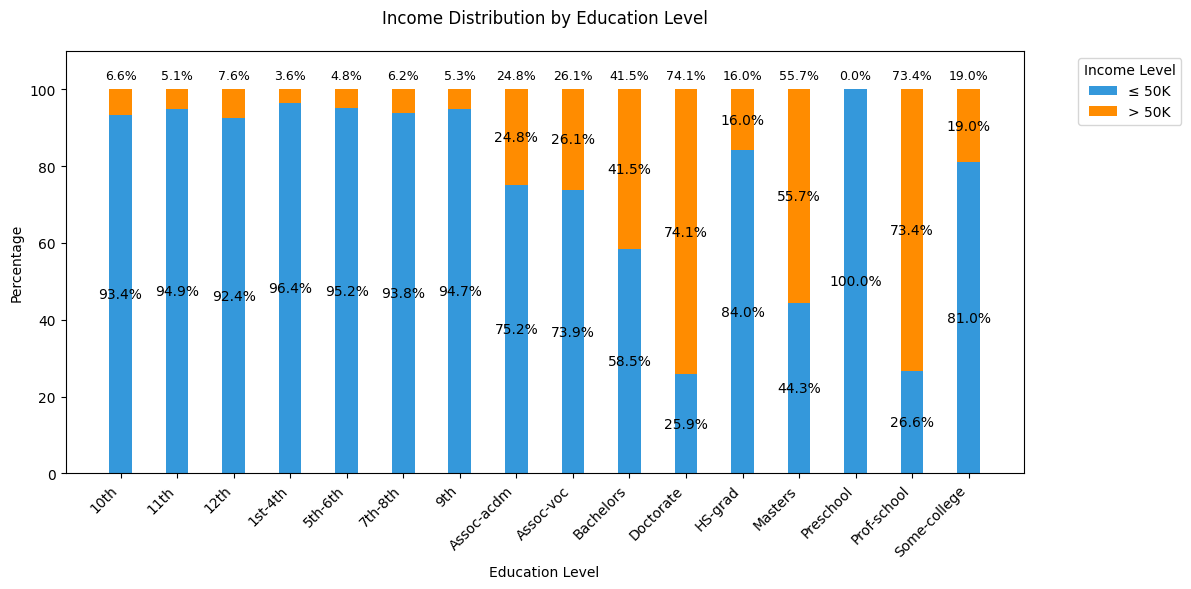

In [2]:
# Compute a cross tabulation
income_by_education = (
    pd.crosstab(df["education"], df["income"], normalize="index") * 100
)

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.4
x = range(len(income_by_education))

# Plot a stacked bar chart
ax.bar(x, income_by_education["<=50K"], width=bar_width, label="≤ 50K", color="#3498db")
ax.bar(
    x,
    income_by_education[">50K"],
    width=bar_width,
    bottom=income_by_education["<=50K"],
    label="> 50K",
    color="#ff8c00",
)

# Add percentage labels
for i in range(len(income_by_education)):
    # top row labels (>50K)
    ax.text(
        i,
        100 + 2,
        f"{income_by_education['>50K'].iloc[i]:.1f}%",
        ha="center",
        va="bottom",
        fontsize=9,
    )

    # For <=50K
    bottom_val = income_by_education["<=50K"].iloc[i]
    if bottom_val > 10:  # Only show if there's enough space
        ax.text(i, bottom_val / 2, f"{bottom_val:.1f}%", ha="center", va="center")

    # For >50K
    top_val = income_by_education[">50K"].iloc[i]
    if top_val > 10:
        midpoint = bottom_val + top_val / 2
        ax.text(i, midpoint, f"{top_val:.1f}%", ha="center", va="center")

# Customize chart
ax.set_title("Income Distribution by Education Level", pad=20)
ax.set_xlabel("Education Level")
ax.set_ylabel("Percentage")
ax.legend(title="Income Level", bbox_to_anchor=(1.05, 1), loc="upper left")
ax.set_xticks(x)
ax.set_xticklabels(income_by_education.index, rotation=45, ha="right")

ax.set_ylim(0, 110)
ax.set_yticks(range(0, 101, 20))

plt.tight_layout()
plt.show()